# Diplomatura de Especialización en Desarrollo de Aplicaciones con Inteligencia Artificial - Inteligencia Artificial para Juegos (Game IA) - Sesión 2 - Tarea

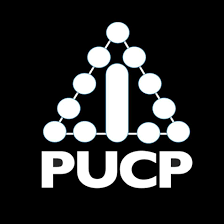
<img src='https://dci.pucp.edu.pe/wp-content/uploads/2014/02/logo-color-pucp1.gif' width=200px>

PhD. Edwin Villanueva, Eng. Daniel Saromo

<font color='orange'>Entorno Grid/Laberinto para búsqueda ciega (sin heurísticas)</font>

En este notebook se implementa un Agente Simple de Solución de Problemas en entornos de Laberinto. 

Búsqueda Ciega (sin información): el agente tiene que llegar de un punto S a un punto G.



El laberinto es leido de un archivo de texto que puede tener los siguientes caracteres:

    '#': Indica que es una celda con obstaculo (impasable) 
    '~': Indica que es una celda con agua (pasable, con costo 5)
    ' ': Indica que es una celda vacia (passable con costo 1)
    'S': Indica que es una celda de Inicio
    'G': Indica que es una celda Objetivo (premio de 100)
    'I': Indica que es una celda objetivo Intermedio (premio de 100)
 


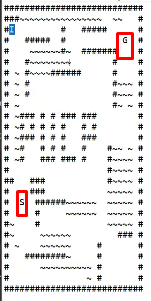


Se requieren los archivos: `maze2.txt`, `maze2_big.txt` y [opcionalmente] `maze2_biGG.txt`, u otros mapas disponibles.

Nota: Ignorar la celda marcada con el caracter `I`.

**TAREA (2 puntos en total):** Completar las funciones: `actions`, `result`, y `path_cost` de la clase `MazeSearchProblem`. Además, seguir las instrucciones referentes a la función `actions` especificadas abajo, y completar las dos tablas.



Completar con su código los campos requeridos y subir su notebook solucionado a la plataforma PAIDEIA. El formato del nombre del notebook es: `Desafio2_APELLIDOPATERNO_NOMBRE.ipynb`.

Es responsabilidad del alumno verificar que el archivo que subió es el correcto. Respetar los lineamientos de la entrega de archivo, ya que influirá en su calificación. La fecha límite de entrega del presente desafío se encuentra en PAIDEIA.

# Funciones para leer el laberinto de disco

<b>`readMazeFromFile`:</b>  La funcion `readMazeFromFile` lee un archivo de disco que contiene un laberinto y retorna una matriz de celdas del laberinto leido (`grid`). La variable `grid` es una lista de listas, ejemplo: `[['#','S',' '],['#',' ','G'],['~','#','~']]`.

In [ ]:
def readMazeFromFile(file):
  #leer laberinto del archivo
    fin = open(file)
    lines = fin.read().splitlines()
    grid = []
    for line in lines: 
        grid.append(list(line))
    return grid

<b>`getLocCells`:</b> La funcion `getLocCells` devuelve la localizacion de la celda inicial (S) y celda objetivo (G) en un grid

In [ ]:
def getLocCells(grid):
  #permite localizar donde está la celda inicial, final y la intermedia

    numRows = len(grid)
    numCols = len(grid[0])
    for i in range(numRows):
        for j in range(numCols):
            if len(grid[i]) != numCols:
                raise "Grid no Rectangular"
            if grid[i][j] == 'S':
                cell_S = (i,j)
            if grid[i][j] == 'G':
                cell_G = (i,j)
            if grid[i][j] == 'I':
                cell_I = (i,j)
                
    if cell_S == None:
        raise "No hay celda de Inicio"
    if cell_G == None:
        raise "No hay celda Objetivo (G)"
    if cell_I == None:
        raise "No hay celda de Objetivo Intermedio (I)"        
        
    return cell_S, cell_G, cell_I 

#### <b> Funciones para mostrar los resultados en el laberinto</b> 

In [ ]:
def grid2Str(grid):
    """ Convierte un grid a un string para vizualizacion """
    numRows = len(grid)
    numCols = len(grid[0])
    strGrid = []
    headerLine = ' ' + ('-' * (numCols)) + ' '
    strGrid.append(headerLine)
    for row in grid:
        rowLine = '|' + ''.join(row) + '|'
        strGrid.append(rowLine)
    strGrid.append(headerLine)
    return '\n'.join(strGrid)

In [ ]:
def showAgent(grid, agent_location, agent_performance):
    """ Muestra los resultados en el grid.   """
    grid_copy = []
    for row in grid:
        grid_copy.append([x for x in row]) 
    row,col = agent_location
    grid_copy[row][col] = 'X' 
    print (grid2Str(grid_copy))
    print ('Desempeño del agente = {}'.format(agent_performance))
    print ("-------------------------------")

In [ ]:
def displaySearchResults(grid, visitedNodes, solutionNodes):
    """ Muestra los resultados de busqueda en el grid.   """
    grid_copy = []
    for row in grid:
        grid_copy.append([x for x in row]) 
    for node in visitedNodes:
        row,col = node.state
        ch = grid[row][col]
        if ch != 'S' and ch != 'G': grid_copy[row][col] = 'o' 
    for node in solutionNodes:  
        row,col = node.state
        ch = grid[row][col]
        if ch != 'S' and ch != 'G': grid_copy[row][col] = 'x'    
    print (grid2Str(grid_copy))
    print ("x - celdas en la solucion")
    print ("o - celdas visitadas durante la busqueda")
    print ("-------------------------------")

# Implementacion del Entorno  


#### Clase <b>Thing</b>

  Esta clase generica representa cualquier objeto fisico que puede aparecer en un <b>Ambiente</b>. (No editar)  

In [ ]:
class Thing(object):

    def is_alive(self):
        """Cosas 'vivas'deben retornar true."""
        return hasattr(self, 'alive') and self.alive

    def show_state(self):
        """Muestra el estado interno del agente. Subclases deben sobreescribir esto."""
        print("I don't know how to show_state.")

#### Clase <b>Environment</b>

Esta clase abstracta representa un entorno de tareas. Clases de entornos reales heredan de esta. En un entorno tipicamente se necesitará implementar 2 cosas:
<b>percept</b>, que define la percepción que el agente ve; y 
<b>execute_action</b>, que define los efectos de ejecutar una acción. 
El entorno mantiene una lista de .things y .agents (el cual es un subconjunto de .things). Cada elemento de .things tiene un slot .location. (No editar)

In [ ]:
class Environment(object):

    def __init__(self):
        self.things = []
        self.agents = []

    def thing_classes(self):
        return []  # List of classes that can go into environment

    def percept(self, agent):
        """Retorna la percepcion que el agente 'agent' ve en este punto."""
        raise NotImplementedError

    def execute_action(self, agent, action):
        """El agente 'agent' ejecuta una accion 'action' en el entorno."""
        raise NotImplementedError

    def default_location(self, thing):
        """Localización por defecto para colocar una nueva cosa sin localizacion especificada."""
        raise NotImplementedError

    def is_done(self):
        """Retorna True si no hay ningun agente vivo"""
        return not any(agent.is_alive() for agent in self.agents)

    def add_thing(self, thing, location=None):
        """Añade una cosa thing al entorno en la localizacion location. 
           Si thing es un programa de agente, crea un nuevo agente con ese programa."""
        if not isinstance(thing, Thing):
            thing = Agent(thing)
        assert thing not in self.things, "No añade la misma cosa dos veces"
        
        if location is not None:
            thing.location = location 
        else:
            #print('colocara localizacion por defecto')
            self.default_location(thing)
        self.things.append(thing)
        if isinstance(thing, Agent):
            thing.performance = 0
            self.agents.append(thing)

    def step(self):
        """Ejecuta un paso del entorno (llama a los programas de los agentes, obtiene sus acciones y las ejecuta). """
        if not self.is_done():
            actions = []
            for agent in self.agents:
                if agent.alive:
                    actions.append(agent.program(self.percept(agent)))
                else:
                    actions.append("")
            for (agent, action) in zip(self.agents, actions):
                self.execute_action(agent, action)

    def run(self, steps=1000):
        """Ejecuta steps pasos en el entorno."""
        for step in range(steps):
            if self.is_done():
                return
            self.step()

#### Clase <b>MazeEnvironment</b> | CENTRAL

Tipo de environment que describe el laberinto.

Esta clase implementa el entorno del laberinto. El estado percibido por un agente en este entorno corresponde a la tupla [grid, location]. Las acciones posibles para un agente son: 'N' (ir una celda al norte), 'S' (ir una celda al sur), 'W' (ir una celda al oeste), 'E' (ir una celda al este)  

In [ ]:
class MazeEnvironment(Environment):
    
    def __init__(self, grid):
        super().__init__()
        self.grid = grid
        self.numRows = len(grid)
        self.numCols = len(grid[0])
        self.cell_S, self.cell_G, self.cell_I = getLocCells(grid) #obtiene localizaciones de celdas S, G, I
        self.flag_G = False  # Flag que indica que un agente visitó previamente a la celda G 
        self.flag_I = False  # Flag que indica que un agente visito previamente a la celda I 
        
    def default_location(self, agent):
        """Coloca Localización por defecto a un agente sin localizacion especificada (en celda 'S')."""
        agent.location = self.cell_S
        
    def thing_classes(self):
        return [Agent]

    def percept(self, agent):
        """Retorna el estado del ambiente (location)"""
        return agent.location
    
    def __isValidLocation(self,location):
        """ Retorna true si la localizacion dada corresponde a una celda no bloqueada valida """
        row,col = location
        if row < 0 or row >= self.numRows:
            return False
        if col < 0 or col >= self.numCols:
            return False
        return not self.grid[row][col] == '#'       

    def execute_action(self, agent, action):
        """Implementa el MAPA De TRANSICION: Cambia la posicion del agente de acuerdo a la accion solicitada """
        row,col = agent.location   # obtiene posicion actual del agente
        
        if action == 'N' and self.__isValidLocation((row-1, col)):
            agent.location = (row-1, col)
            agent.performance -= 1
        elif action == 'S' and self.__isValidLocation((row+1, col)):
            agent.location = (row+1, col)
            agent.performance -= 1
        elif action == 'W' and self.__isValidLocation((row, col-1)):
            agent.location = (row, col-1)
            agent.performance -= 1
        elif action == 'E' and self.__isValidLocation((row, col+1)):
            agent.location = (row, col+1)
            agent.performance -= 1
            
        if agent.location == self.cell_G and self.flag_G == False :
            agent.performance += 100     # suma 100 puntos al agente cuando llega por primera vez a celda G 
            self.flag_G == True
            
        if agent.location == self.cell_I and self.flag_I == False :
            agent.performance += 100     # suma 100 puntos al agente cuando llega por primera vez a celda I 
            self.flag_I == True

# Implementacion de un Agente Solucionador  para el Laberinto  


#### Clase <b>Agent</b>

Un agente es una subclase de Thing con un slot obligatorio: <b>.program</b>, el cual almacena la funcion que implementa el <b>programa del agente</b>. Esta funcion debe tomar como argumento la <b>percepcion</b> del agente y debe retornar una <b>accion</b>. La definicion de Percepcion y Accion depende del ambiente de trabajo (environment) donde el agente existe. El agente tambien puede tener el slot <b>.performance</b>, que mide el desempeño del agente en su ambiente.

In [ ]:
import collections
import random

class Agent(Thing):
    def __init__(self, program=None):
        self.alive = True
        self.performance = 0
        assert isinstance(program, collections.Callable)
        self.program = program

#### Clase <b>SearchProblem</b>

Esta es una clase abstracta para definir problemas de busqueda. Se debe hacer subclases que implementen los metodos de las acciones, resultados, test de objetivo y el costo de camino. Entonces se puede instanciar las subclases y resolverlos con varias funciones de busqueda.

In [ ]:
class SearchProblem(object):
    def __init__(self, initial, goal=None):
        """Este constructor especifica el estado inicial y posiblemente el estado(s) objetivo(s),
        La subclase puede añadir mas argumentos."""
        self.initial = initial
        self.goal = goal

    def actions(self, state):
        """Retorna las acciones que pueden ser ejecutadas en el estado dado.
        El resultado es tipicamente una lista."""
        raise NotImplementedError

    def result(self, state, action):
        """Retorna el estado que resulta de ejecutar la accion dada en el estado state.
        La accion debe ser alguna de self.actions(state)."""
        raise NotImplementedError

    def goal_test(self, state):
        """Retorna True si el estado pasado satisface el objetivo."""
        raise NotImplementedError

    def path_cost(self, c, state1, action, state2):
        """Retorna el costo del camino de state2 viniendo de state1 con 
        la accion action, asumiendo un costo c para llegar hasta state1. 
        El metodo por defecto cuesta 1 para cada paso en el camino."""
        return c + 1

####  <b> Clase MazeSearchProblem </b> | TAREA

Esta es una subclase de SearchProblem que implementa concretamente el problema de busqueda en laberinto. El constructor recibe el grid del laberinto, una localizacion inicial y una una localizacion objetivo. Cada estado es representado internamente como una tupla (row,col) que indica la posicion del agente en una celda del grid. 

In [ ]:
class MazeSearchProblem(SearchProblem):
    """Para esta clase (LPOO), se pide que la búsqueda de las acciones legales inicie desde la acción `'N'`, y en sentido horario."""
    def __init__(self, grid, initial, goal):
        """El constructor recibe el grid, localizacion inicial y localizacion objetivo"""
        self.grid = grid
        self.numRows = len(grid)
        self.numCols = len(grid[0])
        self.initial = initial
        self.goal = goal
        
        self.numNodesExpanded = 0        
        self.expandedNodeSet = {}   
        
    def __isValidState(self,state):
        """ Retorna true si el estado dado corresponde a una celda no bloqueada valida """
        row,col = state
        if row < 0 or row >= self.numRows:
            return False
        if col < 0 or col >= self.numCols:
            return False
        return not self.grid[row][col] == '#'         

    def actions(self, state):
        """Retorna una lista con las acciones legales desde la celda actual, a partir de un `state`. """
        row,col = state
        #indicar cuál es la lista de acciones que este agente tiene permitido realizar
        #según la posición que esté: hacerlo por tipo de caracter constitutivo del laberinto! 
        #state:celda.
        #print(row,col)

        #cuando completemos las acciones válidas, se inice con la acción Norte y gire en sentido horario
        #N, E, S y W
        acciones = []

        if self.__isValidState( (row-1,col) ):
          acciones.append('N')
        if self.__isValidState( (row,col+1) ):
          acciones.append('E')
        if self.__isValidState( (row+1,col) ):
          acciones.append('S')
        if self.__isValidState( (row,col-1) ):
          acciones.append('W')
        #DEBEN USAR la función `self.__isValidState` para validar la celda antes de generar la acción.
        #Usar `row` y `col`.
        
        #¿cómo sé que una celda destino es válida? usar __isValidState
        #recordar: '__isValidState' retorna TRUE si es que el estado ingresado es una celda no bloqueada válida
        #en base al row,col ingresado como tupla en __isValidState podremos saber si es celda no bloqueda (True) o sí (False)

        #por ejemplo: acciones = ['N', 'E']

        return acciones
    
    def result(self, state, action):
        """Retorna el estado que resulta de ejecutar la accion dada desde la celda actual.
        La accion debe ser alguna de self.actions(state). Las accion `action` recibida es una acción valida?
        Ver la generación de `child_node`."""  
        #nos dice cuál es la siguiente celda
        #completar con las cuatro coordenadas

        #Completar el procedimiento similar para las acciones que llevaria el agente
        row,col = state
        newState = ()

        if action == 'N':
            newState = (row-1, col)
        if action == 'E':
            newState = (row, col+1)           
        if action == 'S':
            newState = (row+1,col)
        if action == 'W':
            newState = (row, col-1)

        return newState
        
    def goal_test(self, state):
        """Retorna True si state es self.goal"""
        return (self.goal == state) 

    def path_cost(self, c, state1, action, state2):
        """Retorna el costo del camino de state2 viniendo de state1 con la accion action 
        El costo del camino para llegar a state1 es c. El costo de la accion sale del grid """
        row, col = state2
        #computar el costo de caer en cada celda según la leyenda definida arriba
        #Completar los costos para cuando la celda es vacía (' ') y cuando tiene agua ('~').
        if self.grid[row][col] ==  ' ': #celda vacía
          actionCost = 1
        elif self.grid[row][col] == '~': #celda con agua
          actionCost = 5
        #método para determinar el valor del caracter | 
        #copiar igualito esto para asignar el costo segun celda por caracter    
        elif self.grid[row][col] == 'I' or self.grid[row][col] == 'G' or self.grid[row][col] == 'S':
            actionCost = 1
        else:
            raise "El costo de una celda bloqueada no esta definido" 
        return c + actionCost #aqui se guarda ese costo al costo total 'c'

#### Clase <b>Node</b>

Estructura de datos para almacenar la informacion de un nodo en un <b>arbol de busqueda</b>. Contiene información del nodo padre y el estado que representa el nodo. Tambien incluye la accion que nos llevo al presente nodo y el costo total del camino desde el nodo raiz hasta este nodo.

In [ ]:
class Node:

    def __init__(self, state, parent=None, action=None, path_cost=0):
        "Crea un nodo de arbol de busqueda, derivado del nodo parent y accion action"
        self.state = state
        self.parent = parent
        self.action = action
        self.path_cost = path_cost
        self.depth = 0
        if parent:
            self.depth = parent.depth + 1

    def expand(self, problem):
        "Devuelve los nodos alcanzables en un paso a partir de este nodo."
        return [self.child_node(problem, action)
                for action in problem.actions(self.state)]

    def child_node(self, problem, action):
        next_state = problem.result(self.state, action)
        return Node(next_state, self, action,
                    problem.path_cost(self.path_cost, self.state, action, next_state))

    def solution(self):
        "Retorna la secuencia de acciones para ir de la raiz a este nodo."
        return [node.action for node in self.path()[1:]]

    def path(self):
        "Retorna una lista de nodos formando un camino de la raiz a este nodo."
        node, path_back = self, []
        while node:
            path_back.append(node)
            node = node.parent
        return list(reversed(path_back))

#### Clase <b>FIFOQueue</b> 
Define la clase que implementa una cola tipo FIFO First-In-First-Out (para BFS)

In [ ]:
from collections import deque

class FIFOQueue(deque):
    """Una cola First-In-First-Out"""
    def pop(self):
        return self.popleft()

#### <b>Algoritmo general de búsqueda con memoria de estados visitados (Graph Search)</b>

Busca en los sucesores de un problema para encontrar un objetivo. El argumento frontier debe ser una cola vacia. Si dos caminos arrivan al mismo estado, solo usa el primero.

In [ ]:
def graph_search(problem, frontier):

    frontier.append(Node(problem.initial))
    explored = set()
    visited_nodes = []   # almacena nodos visitados durante la busqueda (para fines de visualizacion)
    while frontier:
        node = frontier.pop()
        visited_nodes.append(node)   # nodo que se toma de la frontera es nodo visitado 
        if problem.goal_test(node.state):
            return node, visited_nodes
        explored.add(node.state)
        frontier.extend(child for child in node.expand(problem)
                        if child.state not in explored and
                        child not in frontier)
    return None

### Programa de agente solucionador de problemas para el entorno MazeEnvironment


In [ ]:
class MazeSearchAgentProgram:
    def __init__(self, grid, search_method):
        self.grid = grid
        self.initial, self.cell_G, self.cell_I = getLocCells(grid) # obtiene celdas S, G, I del laberinto
        #IGNORAR LA CELDA I
        self.goal = self.cell_G  # celda G  es el objetivo por defecto del agente
        self.search_method = search_method
        self.seq = []  # lista de acciones a ejecutar, inicialmente vacia
        
    def __call__(self, percept):
        state = percept
        print('Agente percibiendo localizacion = {}'.format(state))
        
        if state == self.goal:    # Si el ambiente esta en el estado objetivo no hace nada
            return 'None'
        if not self.seq:  # si la lista de acciones esta vacia
            print('Planeando solucion: estado_inicial = {}. estado_objetivo={}'.format(state,self.goal))
            search_problem = MazeSearchProblem(self.grid, state, self.goal) # instancia el problema de busqueda
            if self.search_method == 'bfs':
                # busca solucion con busqueda en amplitud
                goal_node, visited_nodes = graph_search(search_problem, FIFOQueue()) # frontera tipo cola FIFO 
            elif self.search_method == 'dfs':
                # busca solucion con busqueda en profundidad
                goal_node, visited_nodes = graph_search(search_problem, []) # frontera tipo pila ([] es una pila en Python)
            else:
                raise NotImplementedError
                        
            if goal_node == None: # sin solucion
                print('No se pudo encontrar solucion para el maze con metodo {}'.format(self.search_method) )
                return 'None'
            
            self.seq = goal_node.solution()
            print('Solution found with {}: Seq = {}. visited_nodes={}. path_cost = {}'.format(self.search_method, self.seq, len(visited_nodes),goal_node.path_cost))
            displaySearchResults(self.grid, visited_nodes, goal_node.path())
            
        action = self.seq.pop(0)       
        return action 

# Probando el agente solucionador de problemas en MazeEnvironment

In [ ]:
# Carga un laberinto de archivo en disco, instancia el entorno y visualiza el grid
#mazegrid = readMazeFromFile('maze2.txt') 
#e = MazeEnvironment(mazegrid)
#print(grid2Str(mazegrid))


In [ ]:
# Instancia el agente de solucion de problemas y lo añade al entorno del laberinto
#a = Agent( MazeSearchAgentProgram (mazegrid, 'bfs') )
#e.add_thing(a) 

#showAgent (mazegrid, a.location, a.performance)   # Agente es mostrado como una X

In [ ]:
# Ejecuta 30 pasos del ambiente 
#e.run(30)
#showAgent (mazegrid, a.location, a.performance)  # Agente es mostrado como una X

##### Probatorio - Pregunta 2.1

Entorno: _maze2.txt_

In [ ]:
# Carga un laberinto de archivo en disco, instancia el entorno y visualiza el grid
mazegrid = readMazeFromFile('maze2.txt') 
e = MazeEnvironment(mazegrid)
print(grid2Str(mazegrid))

 ------------------- 
|~~~~~~~~~~~~~~~~~~~|
|~~~~~~~~~~~~~~~~~~~|
|~~~~~          ~~~~|
|~~G~            ~~~|
|########   ~~~~~~~~|
|             ######|
|      S      #~~~~~|
|###### # #####~~~~~|
|     # #      ~~~~~|
| # # ###### ####~~~|
| #          #~~~~~~|
|     ### ####~~~~~~|
|                  I|
 ------------------- 


*** bfs ***

In [ ]:
# Instancia el agente de solucion de problemas y lo añade al entorno del laberinto
a = Agent( MazeSearchAgentProgram (mazegrid, 'bfs') )
e.add_thing(a) 

showAgent (mazegrid, a.location, a.performance)   # Agente es mostrado como una X

 ------------------- 
|~~~~~~~~~~~~~~~~~~~|
|~~~~~~~~~~~~~~~~~~~|
|~~~~~          ~~~~|
|~~G~            ~~~|
|########   ~~~~~~~~|
|             ######|
|      X      #~~~~~|
|###### # #####~~~~~|
|     # #      ~~~~~|
| # # ###### ####~~~|
| #          #~~~~~~|
|     ### ####~~~~~~|
|                  I|
 ------------------- 
Desempeño del agente = 0
-------------------------------


In [ ]:
# Ejecuta 30 pasos del ambiente 
e.run(30)
showAgent (mazegrid, a.location, a.performance) 

Agente percibiendo localizacion = (6, 6)
Planeando solucion: estado_inicial = (6, 6). estado_objetivo=(3, 2)
Solution found with bfs: Seq = ['N', 'E', 'E', 'N', 'N', 'W', 'W', 'W', 'W', 'W', 'W']. visited_nodes=1220. path_cost = 15
 ------------------- 
|~~~~~ooooooo~~~~~~~|
|~~~~ooooooooo~~~~~~|
|~~~ooooooooooo ~~~~|
|~~Gxxxxxxoooooo ~~~|
|########xoooooo~~~~|
|ooooooxxxoooo######|
|ooooooSoooooo#~~~~~|
|######o#o#####~~~~~|
|     #o#ooooooo~~~~|
| # # ######o####~~~|
| #        oo#~~~~~~|
|     ### ####~~~~~~|
|                  I|
 ------------------- 
x - celdas en la solucion
o - celdas visitadas durante la busqueda
-------------------------------
Agente percibiendo localizacion = (5, 6)
Agente percibiendo localizacion = (5, 7)
Agente percibiendo localizacion = (5, 8)
Agente percibiendo localizacion = (4, 8)
Agente percibiendo localizacion = (3, 8)
Agente percibiendo localizacion = (3, 7)
Agente percibiendo localizacion = (3, 6)
Agente percibiendo localizacion = (3, 5)
Agente perc

*** dfs ***

In [ ]:
# Instancia el agente de solucion de problemas y lo añade al entorno del laberinto
a = Agent( MazeSearchAgentProgram (mazegrid, 'dfs') )
e.add_thing(a) 

showAgent (mazegrid, a.location, a.performance)   # Agente es mostrado como una X

 ------------------- 
|~~~~~~~~~~~~~~~~~~~|
|~~~~~~~~~~~~~~~~~~~|
|~~~~~          ~~~~|
|~~G~            ~~~|
|########   ~~~~~~~~|
|             ######|
|      X      #~~~~~|
|###### # #####~~~~~|
|     # #      ~~~~~|
| # # ###### ####~~~|
| #          #~~~~~~|
|     ### ####~~~~~~|
|                  I|
 ------------------- 
Desempeño del agente = 0
-------------------------------


In [ ]:
# Ejecuta 30 pasos del ambiente 
e.run(30)
showAgent (mazegrid, a.location, a.performance) 

Agente percibiendo localizacion = (3, 2)
Agente percibiendo localizacion = (6, 6)
Planeando solucion: estado_inicial = (6, 6). estado_objetivo=(3, 2)
Solution found with dfs: Seq = ['W', 'W', 'W', 'W', 'W', 'W', 'N', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'S', 'E', 'E', 'E', 'E', 'E', 'N', 'W', 'W', 'W', 'W', 'N', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'N', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W']. visited_nodes=168. path_cost = 101
 ------------------- 
|~~~~~~~~~~~~~~~~~~~|
|~~~~~~~~~~~~~~~~~~~|
|~~~~~          ~~~~|
|~~Gxxxxxxxxxxxxxxxx|
|########xxxxxxxxxxx|
|xxxxxxxxxxxxx######|
|xxxxxxSxxxxxx#ooooo|
|###### #o#####ooooo|
|ooooo# #ooooooooooo|
|o#o#o######o####ooo|
|o#oooooooooo#oooooo|
|ooooo###o####oooooo|
|ooooooooooooooooooo|
 ------------------- 
x - celdas en la solucion
o - celdas visitadas durante la busqueda
-------------------------------
Agente percibiendo localizacion = (3, 2)
Agente percibiendo localizacion = (6, 5)
Agente

##### Probatorio - Pregunta 2.1
Entorno: *maze2_big.txt*

In [ ]:
# Carga un laberinto de archivo en disco, instancia el entorno y visualiza el grid
mazegrid = readMazeFromFile('maze2_big.txt') 
e = MazeEnvironment(mazegrid)
print(grid2Str(mazegrid))

 --------------------------- 
|#################~~~~~~~~~~|
|#################    ~~  I#|
|     ~~~~    ~~   ~~~~~   #|
|     ~~S~~  ~~~~  ~~~~~~  #|
|     ~~~~~   #~~   ~~~~~  #|
|     ~~~~~  ###    ~~     #|
|     ~~~~~  ##   ###~     #|
| ~~              ## ~   ###|
| ~~      ##  ~~ ~~ ~~   ###|
|      ~~###  ~~ ~~      ###|
|##########   ~ G   ~   ~###|
|~~~~~~~~         ~~~~##    |
| ### # # ### ### ~~~~##~  ~|
| # # # # #   # #   ~~~~~~  |
| ### # # #   ###   ~~~~~~ ~|
| #   # # #   #     ~##~    |
| #   ### ### #     ~##    ~|
|~~~~~~~~~~~~~~~~~~~~~~~~~~~|
 --------------------------- 


*** bfs ***

In [ ]:
# Instancia el agente de solucion de problemas y lo añade al entorno del laberinto
a = Agent( MazeSearchAgentProgram (mazegrid, 'bfs') )
e.add_thing(a) 

showAgent (mazegrid, a.location, a.performance)   # Agente es mostrado como una X

 --------------------------- 
|#################~~~~~~~~~~|
|#################    ~~  I#|
|     ~~~~    ~~   ~~~~~   #|
|     ~~X~~  ~~~~  ~~~~~~  #|
|     ~~~~~   #~~   ~~~~~  #|
|     ~~~~~  ###    ~~     #|
|     ~~~~~  ##   ###~     #|
| ~~              ## ~   ###|
| ~~      ##  ~~ ~~ ~~   ###|
|      ~~###  ~~ ~~      ###|
|##########   ~ G   ~   ~###|
|~~~~~~~~         ~~~~##    |
| ### # # ### ### ~~~~##~  ~|
| # # # # #   # #   ~~~~~~  |
| ### # # #   ###   ~~~~~~ ~|
| #   # # #   #     ~##~    |
| #   ### ### #     ~##    ~|
|~~~~~~~~~~~~~~~~~~~~~~~~~~~|
 --------------------------- 
Desempeño del agente = 0
-------------------------------


In [ ]:
# Ejecuta 30 pasos del ambiente 
e.run(30)
showAgent (mazegrid, a.location, a.performance) 

Agente percibiendo localizacion = (3, 7)
Planeando solucion: estado_inicial = (3, 7). estado_objetivo=(10, 15)
Solution found with bfs: Seq = ['E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'S', 'S', 'S', 'S', 'S', 'S', 'S']. visited_nodes=16210. path_cost = 43
 --------------------------- 
|#################ooo~~~~~~~|
|#################oooo~~  I#|
|oooooooooooooooooooooo~   #|
|oooooooSxxxxxxxxooooooo~  #|
|ooooooooooooo#oxoooooo~~  #|
|oooooooooooo###xooooo     #|
|oooooooooooo##oxo###~     #|
|oooooooooooooooxo## ~   ###|
|ooooooooo##ooooxoo ~~   ###|
|oooooooo###ooooxo~      ###|
|##########oooooG   ~   ~###|
|~~~~~~~~ ooooo   ~~~~##    |
| ### # # ###o### ~~~~##~  ~|
| # # # # #   # #   ~~~~~~  |
| ### # # #   ###   ~~~~~~ ~|
| #   # # #   #     ~##~    |
| #   ### ### #     ~##    ~|
|~~~~~~~~~~~~~~~~~~~~~~~~~~~|
 --------------------------- 
x - celdas en la solucion
o - celdas visitadas durante la busqueda
-------------------------------
Agente percibiendo localizacion = (3, 8)
Agent

*** dfs ***

In [ ]:
# Instancia el agente de solucion de problemas y lo añade al entorno del laberinto
a = Agent( MazeSearchAgentProgram (mazegrid, 'dfs') )
e.add_thing(a) 

showAgent (mazegrid, a.location, a.performance)   # Agente es mostrado como una X

 --------------------------- 
|#################~~~~~~~~~~|
|#################    ~~  I#|
|     ~~~~    ~~   ~~~~~   #|
|     ~~X~~  ~~~~  ~~~~~~  #|
|     ~~~~~   #~~   ~~~~~  #|
|     ~~~~~  ###    ~~     #|
|     ~~~~~  ##   ###~     #|
| ~~              ## ~   ###|
| ~~      ##  ~~ ~~ ~~   ###|
|      ~~###  ~~ ~~      ###|
|##########   ~ G   ~   ~###|
|~~~~~~~~         ~~~~##    |
| ### # # ### ### ~~~~##~  ~|
| # # # # #   # #   ~~~~~~  |
| ### # # #   ###   ~~~~~~ ~|
| #   # # #   #     ~##~    |
| #   ### ### #     ~##    ~|
|~~~~~~~~~~~~~~~~~~~~~~~~~~~|
 --------------------------- 
Desempeño del agente = 0
-------------------------------


In [ ]:
# Ejecuta 30 pasos del ambiente 
e.run(30)
showAgent (mazegrid, a.location, a.performance) 

Agente percibiendo localizacion = (10, 15)
Agente percibiendo localizacion = (3, 7)
Planeando solucion: estado_inicial = (3, 7). estado_objetivo=(10, 15)
Solution found with dfs: Seq = ['W', 'W', 'W', 'W', 'W', 'W', 'W', 'S', 'S', 'S', 'S', 'S', 'S', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'N', 'W', 'W', 'W', 'W', 'W', 'W', 'N', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'S', 'S', 'S', 'W', 'S', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'S', 'S', 'S', 'S', 'S', 'S', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'N', 'W', 'W', 'W', 'W', 'N', 'E', 'E', 'E', 'E', 'N', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'N', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'N', 'W', 'W', 'W', 'N', 'N', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W']. visited_nodes=153. path_cost = 379
 --------------------------- 
|#################~~~~~~~~~~|
|#################    ~~  I#|
|     ~~~~    ~~   ~~~~~   #|
|xx

## Preguntas (2 puntos en total)

Completar los siguientes métodos de la clase `MazeSearchProblem`: `actions`, `result`, y `path_cost`  (0.25 puntos por cada función).

<b>1) Para el mapa que está en el archivo 'maze2.txt', indique los valores b, d, m (considere buqueda sin estados repetidos) (0.25 puntos en total)</b>
    
      - b: máximo factor de ramificación
      - d: profundidad del nodo objetivo menos profundo
      - m: profundidad máxima del arbol

- Rpta Preg. 1 (para una búsqueda BFs:): 
    *  b: 4
    *  d: 11
    *  m: 35


<b>2) Para el mapa que está en el archivo 'maze2_big.txt', indique el costo del camino, y la cantidad de nodos explorados por los algoritmos bfs y dfs.</b>



- Rpta Preg. 2.1.: archivo 'maze2_big.txt'
    - Costo camino: 
          - BFs: 43 
          - DFs: 379
    - Cantidad de nodos visitados:
          - BFs: 16210
          - DFs: 153


Ejecutar los algoritmos de búsqueda con el laberinto que está en el archivo `maze2.txt` y mostrar los resultados en su notebook. Con dicha información, llenar la siguiente tabla (0.5 puntos):



| Acciones: Sentido horario (desde N) | BFS | DFS |
| :------- | :------: | -----: |
| Costo del camino  | 15       |  101   |
| Nodos visitados   | 1220     | 168 |


<b>3) De acuerdo a los resultados encontrados con bfs y dfs, ¿cuál método explora menos celdas para encontrar la solucion y cuál garantiza optimalidad? El algoritmo que usted ha seleccionado, ¿garantizaría optimalidad para un laberinto como los mostrados (mismas reglas y entorno), pero de cualquier tamaño? Explique relacionando con la teoría (0.5 puntos).</b>

- Rpta 3:

Normalmente, el método que explora menos celdas para hallar una solución es el método DFs (apenas 168 nodos visitados vs 1220). Sin embargo, el método que garantiza la optimalidad en la misma es el BFs (costo del camino de 15 vs 101). Nótese que esta última garantía está determinada por dos condiciones esenciales: 1) si todos los path tuviesen un costo equivalente; y 2) si el total de 'b' es finito.

En ese sentido, el algoritmo seleccionado bajo el método de Búsqueda de Amplitud (BFs) está mucho más cerca de garantizar la optimilidad en cualquier entorno como los mostrados (preservando el estado actual de las reglas). Esto se debe, principalmente, a que busca la solución cuya profundidad sea menor al pasar por todos los nodos (frontera tipo FIFO). Eto quiere decir que visita primero un nodo y sus vecinos, y luego a los vecinos de los vecinos. Por tanto, no se queda únicamente en la primera solución encontrada. El algoritmo de Búsqueda en Profundidad (DFs), por el contrario, expande el nodo pendiente más alejado (frontera tipo LIFO), y culmina únicamente en la primera solución hallada: pasa por menos nodos, en efecto, pero no garantiza la optimilidad de la solución, sea para casos particulares o generales.


# BONUS

(Esta parte no tiene puntaje, su objetivo es profundizar tu conocimiento teórico)

<b>4) Cuál de los metodos de busqueda ciega estudiados en clase cree que sería más adecuado para el programa de agente solucionador de problemas de laberintos de cualquier tamaño? Justifique. Resuelva esta pregunta *sin haber realizado la pregunta 5*. </b>

<b>5) Ejecute los algoritmos bfs y dfs con el mapa que está en el archivo `maze2_big.txt`. Comente respecto a la respuesta que brindó en el inciso 4. </b>

<b>6) Pruebe los algoritmos con el mapa que está en el archivo `maze2_biGG.txt`. Puedes crear tus propios mapas y probar. Compara el tiempo necesario para solucionar los laberintos ;)</b>




En el campo de IA, existirán otras maneras más eficientes de hacer búsqueda?

<img src='https://elcomercio.pe/resizer/DM-q6iBz4HPsMCK706VMaWxT3IU=/1200x800/smart/arc-anglerfish-arc2-prod-elcomercio.s3.amazonaws.com/public/E2IT3S5PSZHWZCCISYZIYJJEVQ.jpg' width=400px>

